In [1]:
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from collections import Counter
from IPython.display import HTML

/tmp/ipykernel_11432/2691155819.py:114: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  return HTML(ani.to_jshtml())
/tmp/ipykernel_11432/2691155819.py:114: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) DejaVu Sans.
  return HTML(ani.to_jshtml())
/tmp/ipykernel_11432/2691155819.py:114: UserWarning: Glyph 35789 (\N{CJK UNIFIED IDEOGRAPH-8BCD}) missing from font(s) DejaVu Sans.
  return HTML(ani.to_jshtml())
/tmp/ipykernel_11432/2691155819.py:114: UserWarning: Glyph 20113 (\N{CJK UNIFIED IDEOGRAPH-4E91}) missing from font(s) DejaVu Sans.
  return HTML(ani.to_jshtml())


/home/hxy/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/hxy/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/hxy/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 35789 (\N{CJK UNIFIED IDEOGRAPH-8BCD}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/hxy/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20113 (\N{CJK UNIFIED IDEOGRAPH-4E91}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/hxy/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hxy/.local/lib/python3.10/

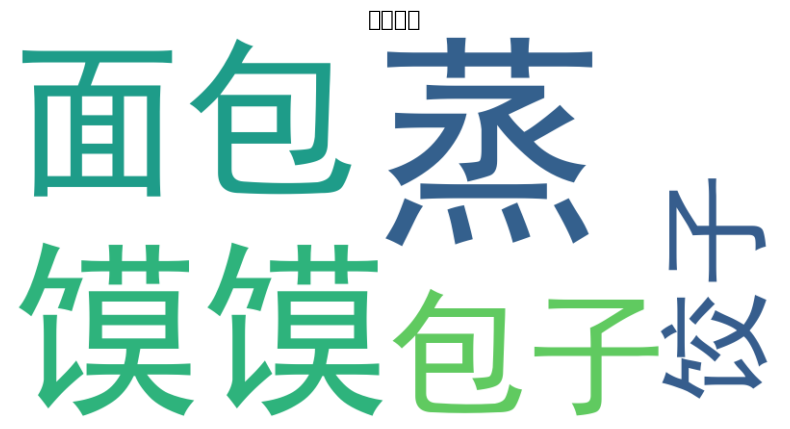

In [4]:
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import matplotlib.animation as animation
from IPython.display import HTML

# 创建一个函数来生成词云
def generate_wordcloud(word_freq, font_path='simhei.ttf'):
    """
    生成词云对象。

    参数:
    - word_freq (dict): 词频字典，例如 {'蒸': 22, '馍馍': 22}
    - font_path (str): 支持中文的字体文件路径

    返回:
    - WordCloud对象
    """
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        font_path=font_path,  # 替换为支持中文的字体路径
        colormap='viridis',
        max_words=200
    ).generate_from_frequencies(word_freq)
    return wordcloud

# 解析 JSON 字符串并生成词频字典
def parse_json_string(json_str):
    """
    解析 JSON 字符串并返回词频字典。

    参数:
    - json_str (str): JSON 格式的字符串，例如 '{"蒸": 22, "馍馍": 22}'

    返回:
    - dict: 词频字典
    """
    try:
        word_freq = json.loads(json_str)
        # 确保所有值都是整数
        word_freq = {str(k): int(v) for k, v in word_freq.items()}
        return word_freq
    except json.JSONDecodeError as e:
        print(f"JSON 解码错误: {e}")
        return {}
    except ValueError as e:
        print(f"值转换错误: {e}")
        return {}

# 更新词云的函数（用于动画）
def update_wordcloud(frame, ax, json_strings, cache, font_path):
    """
    更新词云的动画函数。

    参数:
    - frame (int): 当前帧数
    - ax (matplotlib.axes.Axes): 绘图轴对象
    - json_strings (list): JSON 字符串列表
    - cache (dict): 缓存上一次的词频字典
    - font_path (str): 字体文件路径
    """
    if frame >= len(json_strings):
        return cache

    json_str = json_strings[frame]
    word_freq = parse_json_string(json_str)

    # 检查数据是否发生变化
    if word_freq != cache['last_word_freq']:
        # 生成新的词云
        wordcloud = generate_wordcloud(word_freq, font_path=font_path)
        ax.clear()
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')  # 关闭坐标轴
        ax.set_title("实时词云", fontsize=16)

        # 更新缓存
        cache['last_word_freq'] = word_freq

    return cache

# 初始化动画
def start_animation(json_strings, interval=3000, font_path='simhei.ttf'):
    """
    启动词云动画。

    参数:
    - json_strings (list): JSON 字符串列表
    - interval (int): 刷新间隔（毫秒）
    - font_path (str): 字体文件路径

    返回:
    - HTML: 在 Jupyter Notebook 中显示动画
    """
    fig, ax = plt.subplots(figsize=(10, 5))

    # 初始化缓存：保存上次的词频数据
    cache = {'last_word_freq': {}}

    # 创建 FuncAnimation 对象
    ani = animation.FuncAnimation(
        fig,
        update_wordcloud,
        fargs=(ax, json_strings, cache, font_path),
        frames=len(json_strings),
        interval=interval,
        repeat=True
    )

    # 在 Jupyter Notebook 中显示动画
    return HTML(ani.to_jshtml())

# 示例 JSON 字符串列表
json_strings = [
    '{"蒸": 22, "馍馍": 22}',
    '{"蒸": 25, "馍馍": 20, "面包": 15}',
    '{"蒸": 30, "馍馍": 18, "面包": 20, "包子": 10}',
    '{"蒸": 28, "馍馍": 25, "面包": 22, "包子": 12, "饺子": 8}',
    '{"蒸": 35, "馍馍": 30, "面包": 25, "包子": 15, "饺子": 10}',
    # 可以根据需要添加更多 JSON 字符串
]

# 设置字体路径
font_path = 'simhei.ttf'  # 确保该字体文件存在于你的工作目录中，或者提供完整路径

# 启动画面
html_animation = start_animation(json_strings, interval=3000, font_path=font_path)

# 在 Jupyter Notebook 中显示动画
html_animation


In [2]:
# 创建一个函数来生成词云
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    return wordcloud

# 从 JSON 文件读取数据
def read_json_data(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        return data  # 返回整个 JSON 数据
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return {}

# 根据情感数据生成词云文本
def generate_emotion_text(json_data):
    emotions = [item.get('emotion', 'Unknown') for item in json_data.values()]
    emotion_counts = Counter(emotions)
    # 将情感及其计数转换为格式：emotion1: count1, emotion2: count2, ...
    emotion_text = " ".join([f"{emotion}:{count}" for emotion, count in emotion_counts.items()])
    return emotion_text

# 更新词云的函数（用于实时刷新）
def update_wordcloud(frame, ax, file_path, cache):
    last_data, last_wordcloud = cache
    # 读取最新的 JSON 数据
    json_data = read_json_data(file_path)
    
    # 根据情感数据生成文本
    text = generate_emotion_text(json_data)
    
    # 检查数据是否发生变化
    if text != last_data:
        # 如果数据变化了，则生成新的词云
        wordcloud = generate_wordcloud(text)
        ax.clear()
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')  # 关闭坐标轴
        ax.set_title("Real-Time Emotion Word Cloud")
        return text, wordcloud  # 更新缓存数据
    else:
        # 如果数据没有变化，不做任何更新
        return last_data, last_wordcloud

In [3]:
# 在 Jupyter Notebook 中启用动画显示
%matplotlib notebook

# 主程序
file_path = 'data.json'  # 替换为你的文件路径

# 创建图形
fig, ax = plt.subplots()

# 初始化缓存：保存上次的情感数据和词云
last_data = ""
last_wordcloud = None
cache = [last_data, last_wordcloud]

# 创建 FuncAnimation 对象
ani = FuncAnimation(fig, update_wordcloud, fargs=(ax, file_path, cache), interval=3000, frames=range(100))

# 在 Jupyter 中显示动画
HTML(ani.to_jshtml())  # 使用 to_jshtml() 将动画转换为 HTML 并显示


<IPython.core.display.Javascript object>